# HWQ5-1
## 針對台江國家公園調查的"黑面琵鷺歷年來台數目"進行分析
### 分析資料source website : https://www.tjnp.gov.tw//SurveryC004330.aspx

In [54]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import locale

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

df = pd.read_html('https://www.tjnp.gov.tw/SurveryC004330.aspx?StartDate=2011-04-01&EndDate=2019-04-01',encoding='utf-8')
df_chart=df[0]
df_chart.head()

,0,1,2,3,4
0,日期,溪北 地區,溪南 地區,全區 合計,附註
1,2011/04/10,175,274,449,NaN
2,2011/04/24,97,113,210,NaN
3,2011/10/09,13,42,55,NaN
4,2011/10/22,190,521,711,NaN


In [55]:
colnames = df_chart.loc[0].values
df_date_num=df_chart[1:]
df_date_num.columns = colnames

##  以下分析大台南地區 2011/04/01~2019/04/01 的數目變化

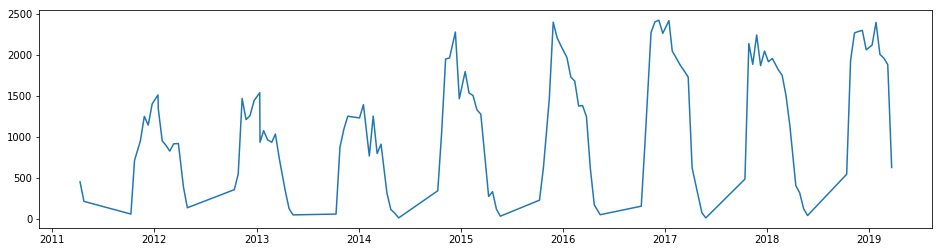

In [74]:
from datetime import datetime
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

dfCopy= df_date_num.loc[:,[ '日期','全區  合計']].copy()

dfCopy['全區  合計'] = dfCopy['全區  合計'].apply(locale.atof)

xs = [datetime.strptime(d, '%Y/%m/%d').date() for d in dfCopy['日期']]   ### datetime.date(2011, 4, 10)
xs_array= mdates.date2num(xs)                                            ## array represents datetimes   x-axis
number = dfCopy['全區  合計'].values

plt.figure(figsize=(16, 4))
plt.plot(xs, number)



##  以下分析大台南地區 2017/05/01~2018/10/01 的數目變化
###  從上圖週期變化可以發現黑面琵鷺數量較多的時期皆為冬季10月至隔年4月左右
###  設定此時間區間的目的是為了取出約一個周期的數據，再進行回歸分析



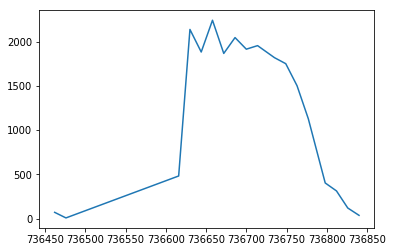

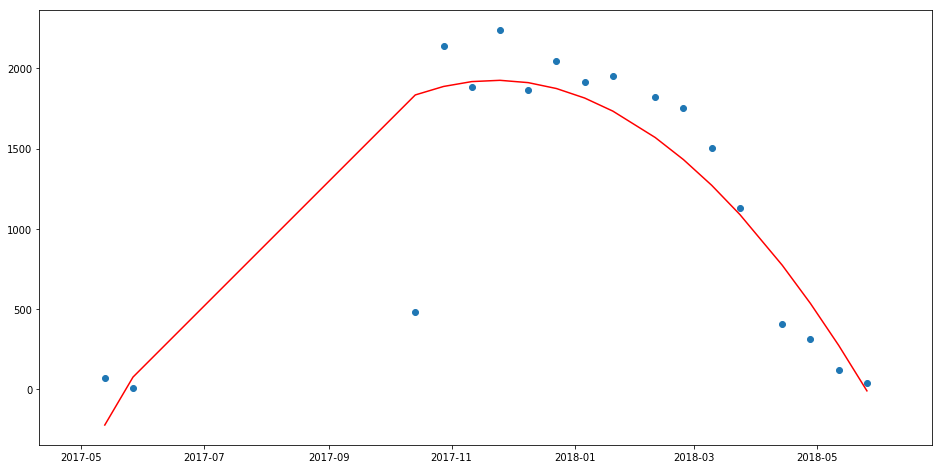

In [86]:
df = pd.read_html('https://www.tjnp.gov.tw/SurveryC004330.aspx?StartDate=2017-05-01&EndDate=2018-10-01',encoding='utf-8')
df_chart=df[0]
df_chart.head()
colnames = df_chart.loc[0].values
df_date_num=df_chart[1:]
df_date_num.columns = colnames

dfCopy= df_date_num.loc[:,[ '日期','全區  合計']].copy()

dfCopy['全區  合計'] = dfCopy['全區  合計'].apply(locale.atof)

xs = [datetime.strptime(d, '%Y/%m/%d').date() for d in dfCopy['日期']]   ### datetime.date(2011, 4, 10)
xs_array= mdates.date2num(xs)                                            ## array represents datetimes   x-axis
number = dfCopy['全區  合計'].values
plt.plot(xs_array,number)


X_poly = np.array([[k, k**2,k**3, k**4, k**5, k**6] for k in xs_array])

regr_poly = LinearRegression()

regr_poly.fit(X_poly, number)

Y_poly = regr_poly.predict(X_poly)

Y_poly

plt.figure(figsize=(16, 8))
plt.scatter(xs, number)
plt.plot(xs, Y_poly, 'r')  


# 以下針對 2011/04/01~2019/04/01期間的整體迴歸分析
## 可以發現因為數據的不規則性提高，因此由多項式也難以擬合出周期的效果，但可以看出整體黑面琵鷺的數量趨勢是上升的，台江國家公園確實有保護保育鳥類及維護棲地的效果。

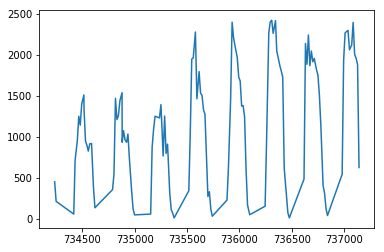

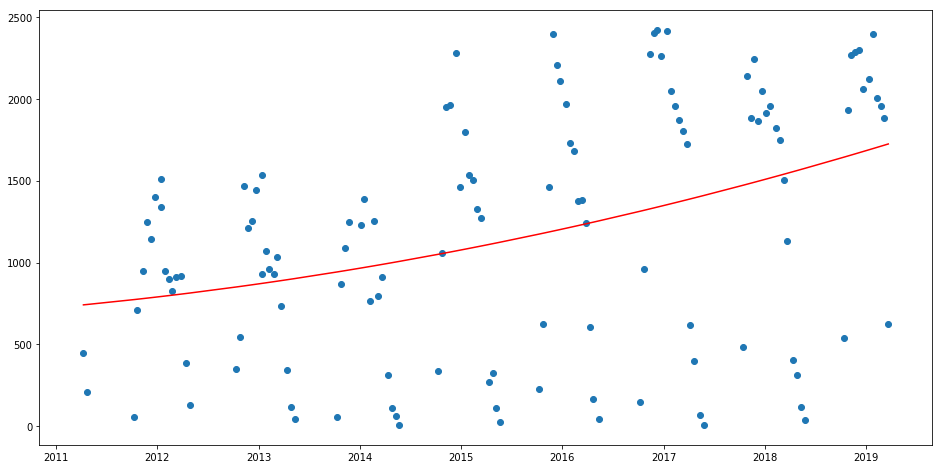

In [87]:
df = pd.read_html('https://www.tjnp.gov.tw/SurveryC004330.aspx?StartDate=2011-04-01&EndDate=2019-04-01',encoding='utf-8')
df_chart=df[0]
df_chart.head()
colnames = df_chart.loc[0].values
df_date_num=df_chart[1:]
df_date_num.columns = colnames

dfCopy= df_date_num.loc[:,[ '日期','全區  合計']].copy()

dfCopy['全區  合計'] = dfCopy['全區  合計'].apply(locale.atof)

xs = [datetime.strptime(d, '%Y/%m/%d').date() for d in dfCopy['日期']]   ### datetime.date(2011, 4, 10)
xs_array= mdates.date2num(xs)                                            ## array represents datetimes   x-axis
number = dfCopy['全區  合計'].values
plt.plot(xs_array,number)


X_poly = np.array([[k, k**2,k**3, k**4, k**5, k**6] for k in xs_array])

regr_poly = LinearRegression()

regr_poly.fit(X_poly, number)

Y_poly = regr_poly.predict(X_poly)

Y_poly

plt.figure(figsize=(16, 8))
plt.scatter(xs, number)
plt.plot(xs, Y_poly, 'r')  